In [3]:
cd ..

c:\Users\Wei Qing\Desktop\y4s2\dsa4263\h2o2.ai


# FileUtil Initialization

In [2]:
from src.utils.file_util import FileUtil

file_util = FileUtil()

# Retrieve Raw Train, Test Data

In [25]:
train = file_util.get_raw_train_data()
test = file_util.get_raw_train_data() #we use raw train as test

In [4]:
train.head()

,Sentiment,Time,Text
0,positive,18/6/21,This is a very healthy dog food. Good for thei...
1,positive,7/7/21,I've been very pleased with the Natural Balanc...
2,positive,18/6/21,"Before I was educated about feline nutrition, ..."
3,positive,7/7/21,"My holistic vet recommended this, along with a..."
4,positive,1/7/21,I bought this coffee because its much cheaper ...


# Preprocessing

In [5]:
from src.preprocessing.transformations import apply_cleaning_train

In [6]:
train = apply_cleaning_train(train)

In [7]:
train.head()

,date,partially_cleaned_text,sentiment,cleaned_text
0,18/6/21,This is a very healthy dog food. Good for thei...,1,healthy dog food good digestion also good smal...
1,7/7/21,I've been very pleased with the Natural Balanc...,1,pleased natural balance dog food dogs issues d...
2,18/6/21,"Before I was educated about feline nutrition, ...",1,educated feline nutrition allowed cats become ...
3,7/7/21,"My holistic vet recommended this, along with a...",1,holistic vet recommended along brands tried ca...
4,1/7/21,I bought this coffee because its much cheaper ...,1,bought coffee much cheaper ganocafe organic re...


# Training

## Sentiment Analysis

In [8]:
from src.models.sentiment_analysis.train.train import sentiment_analysis_train

c:\Users\clift\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
sentiment_analysis_train()

## Topic Modelling

In [24]:
from src.models.topic_modelling.train.train import topic_modelling_train

In [ ]:
topic_modelling_train()

# Evaluation

## Sentiment Analysis

In [ ]:
metrics = file_util.get_metrics("sentiment_analysis")
metrics

{'BERT': {'PR AUC': 0.9650676330441036,
  'Average Precision': 0.9651006951280032}}

In [ ]:
models_prauc = sorted(list(map(lambda item: (item[0], item[1]["PR AUC"]), metrics.items())), key = lambda x: x[1])
print("Best model is {} with PR-AUC {}".format(models_prauc[-1][0], models_prauc[-1][1]))

Best model is BERT with PR-AUC 0.9650676330441036


## Topic Modelling

In [17]:
fig = file_util.get_topics_html("LDA")
fig.update_layout(width = 700, height = 800)

In [19]:
fig = file_util.get_topics_html("BERTopic")
fig.update_layout(width = 700, height = 1000)

In [23]:
fig = file_util.get_topics_html("NMF")
fig.update_layout(width = 700, height = 550)

# Test

In [26]:
from src.models.predict import predict_sentiment_topic

In [ ]:
test = predict_sentiment_topic(test)

In [ ]:
test.head()

## Visualizations

In [4]:
import pandas as pd
from src.visualisation.dashboard_viz import *

test = pd.read_csv("data/predicted/reviews.csv")
vis_df = reformat_data(test)
pio.renderers.default = "svg"
# Later we will predict the test directly in this notebook and not loading the data from predicted folder
# But for now, can take the test directly from predicted folder to make the visualizations

### Visualizations for sentiments

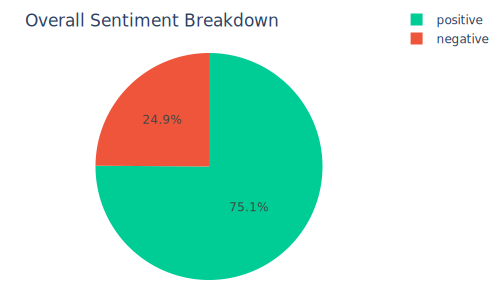

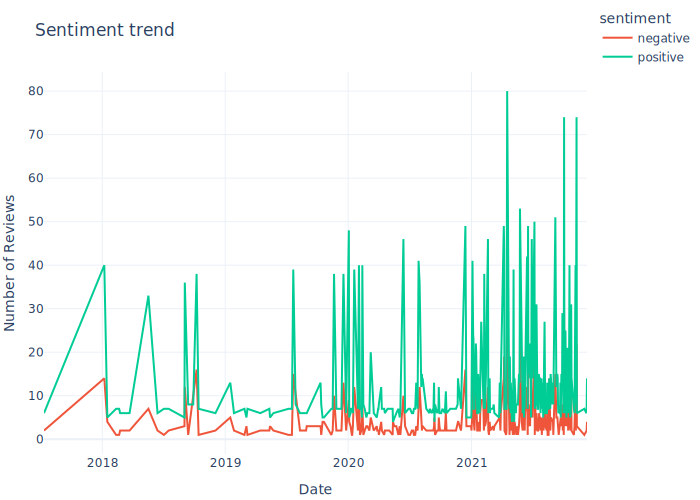

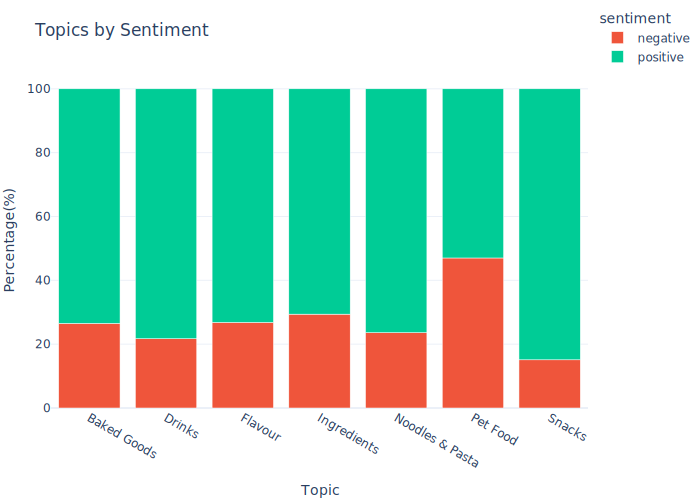

In [5]:
# need Weiqing or Madeline help

sentiment_pie_chart_fig = sentiment_pie_chart(vis_df)
sentiment_trend_fig = sentiment_line_chart_over_time(vis_df)
topics_sentiment_fig = topics_bar_chart(vis_df)

display(sentiment_pie_chart_fig.update_layout(width = 500, height = 300, title='Overall Sentiment Breakdown'))
display(sentiment_trend_fig.update_layout(title='Sentiment trend'))
display(topics_sentiment_fig.update_layout(title='Topics by Sentiment'))

### Visualizations for topics

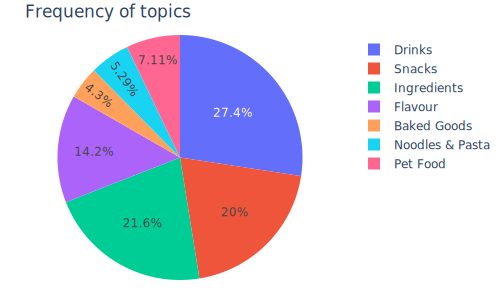

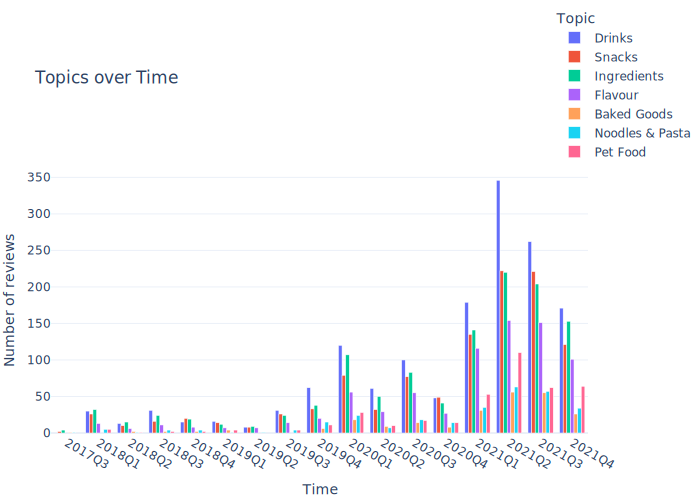

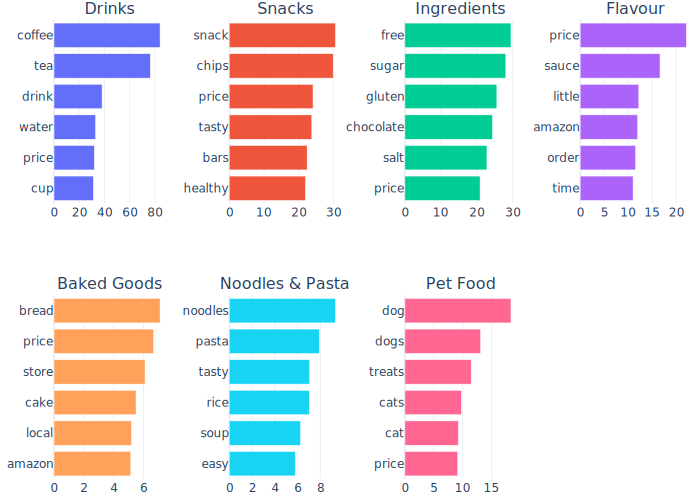

In [6]:
topics_pie_chart_fig = topics_pie_chart(vis_df)
topics_bar_chart_fig = topics_bar_chart_over_time(vis_df, time_frame='Q')
top_key_words_fig = visualise_all_topics(vis_df)

display(topics_pie_chart_fig.update_layout(width = 500, height = 300, title='Frequency of topics'))
display(topics_bar_chart_fig.update_layout(title='Topics over Time'))
display(top_key_words_fig)

### Visualizations for specific topic

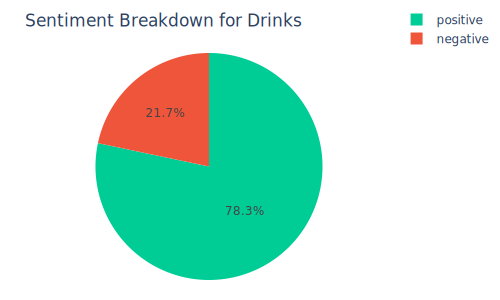

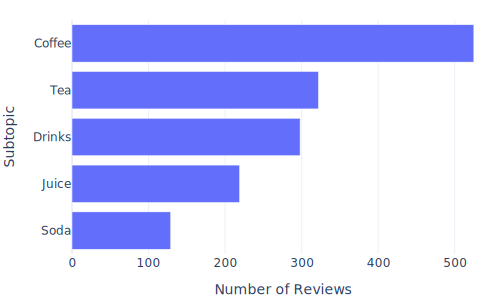

In [7]:
# Subtopics in each topic
select_topic = 'Drinks'

subtopic_fig = get_subtopics(vis_df, topic=select_topic)
subtopic_sentiment_fig = sentiment_pie_chart(vis_df[vis_df["topic"]==select_topic])

display(subtopic_sentiment_fig.update_layout(width = 500, height = 300,  title=f'Sentiment Breakdown for {select_topic}'))
display(subtopic_fig.update_layout(width = 500, height = 300))

# Unit Testing

In [27]:
import src.unittest.unit_testing
from src.unittest.unit_testing import unit_test

In [88]:
print("Methods in unit testing:", [method for method in dir(src.unittest.unit_testing) if method[:4] == "test"])

Methods in unit testing: ['test_apply_cleaning_test', 'test_apply_cleaning_train', 'test_bert_module', 'test_bertopic_module', 'test_cleaning_punctuation_and_html_tags', 'test_cleaning_when_date_is_datetime', 'test_cleaning_when_date_is_string', 'test_convert_sentiment_df', 'test_expand_contractions_df', 'test_lbl2vec_module', 'test_lda_module', 'test_logreg_module', 'test_lowercase_string_df', 'test_lstm_module', 'test_nmf_module', 'test_predict_sentiment', 'test_predict_sentiment_topic', 'test_predict_topic', 'test_predict_when_all_stopwords', 'test_predict_when_empty_review', 'test_predict_when_null_reviews', 'test_remove_empty_reviews_df', 'test_remove_numbers_df', 'test_remove_punctuations_df', 'test_remove_stopwords_df', 'test_remove_trailing_leading_spaces_df', 'test_rename_column_df', 'test_replace_multiple_spaces_df', 'test_replace_multiple_spaces_df_for_tabs', 'test_sentiment_analysis_train_module', 'test_strip_html_tags_df', 'test_topic_modelling_train_module', 'test_zerosho

In [29]:
unit_test()

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at c:\Users\clift\github\h2o2.ai\src/models/sentiment_analysis\train\bert_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.
Some layers from the model checkpoint at c:\Users\clift\github\h2o2.ai\src/models/sentiment_analysis\train\bert_model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that

# Modular Code

In [81]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        if os.path.basename(root) == "__pycache__":
            continue
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

In [82]:
list_files("src")

src/
    __init__.py
    app/
        app.py
        helper.py
        home.py
        sentiments.py
        topics.py
        topic_playground.py
    models/
        classifier.py
        predict.py
        sentiment_analysis/
            eval/
                bert_training.png
                metrics.json
            test/
                predict.py
            train/
                bert.py
                train.py
                bert_model/
                    config.json
                    tf_model.h5
        topic_modelling/
            eval/
                bertopic_topics.html
                lda_topics.html
                nmf_topics.html
            test/
                lbl2vec.py
                predict.py
                zero_shot.py
            train/
                bertopic.py
                lda.py
                nmf.py
                train.py
    preprocessing/
        preprocessing_utils.py
        transformations.py
    unittest/
        unit_testing.py
    util

# OOP

In [62]:
from src.utils.file_util import FileUtil
print("Methods in FileUtil:", [func for func in dir(FileUtil) if callable(getattr(FileUtil, func)) and not func.startswith("__")])
print("Attributes in FileUtil:", list(FileUtil().__dict__.keys()))

Methods in FileUtil: ['check_dir_exists', 'check_filepath_exists', 'create_dir_if_not_exists', 'get_config', 'get_csv', 'get_json', 'get_metrics', 'get_pkl', 'get_processed_train_data', 'get_raw_train_data', 'get_topic_model', 'get_topics_html', 'get_yml', 'put_csv', 'put_json', 'put_metrics', 'put_pkl', 'put_predicted_df', 'put_processed_train_data', 'put_topic_model', 'put_topics_html']
Attributes in FileUtil: ['PROJECT_DIR', 'CONFIG_FILE_NAME', 'CONFIG_PARAMS', 'TEST_FILE_NAME', 'TRAIN_FILE_NAME', 'MODEL_FILE_NAME', 'METRICS_FILE_NAME', 'BERT_TRAINING_GRAPH_FILENAME', 'LDA_TOPIC_FILE_NAME', 'BERTOPIC_TOPIC_FILE_NAME', 'NMF_TOPIC_FILE_NAME', 'RAW_DATA_DIR', 'PROCESSED_DATA_DIR', 'PREDICTED_DATA_DIR', 'SENTIMENT_ANALYSIS_DIR', 'TOPIC_MODELLING_DIR', 'SENTIMENT_ANALYSIS_TRAIN_DIR', 'SENTIMENT_ANALYSIS_EVAL_DIR', 'BERT_SENTIMENT_MODEL_DIR', 'BERT_TRAINING_GRAPH_FILE_PATH', 'TOPIC_MODELLING_TRAIN_DIR', 'TOPIC_MODELLING_EVAL_DIR', 'LDA_TOPIC_FILE_PATH', 'BERTOPIC_TOPIC_FILE_PATH', 'NMF_TO

In [63]:
from src.models.sentiment_analysis.train.bert import BERT
print("Methods in BERT:", [func for func in dir(BERT) if callable(getattr(BERT, func)) and not func.startswith("__")])
print("Attributes in BERT:", list(BERT().__dict__.keys()))

Methods in BERT: ['convert_data_to_examples', 'convert_examples_to_tf_dataset', 'evaluate', 'fit', 'plot_training_acc_loss', 'predict']
Attributes in BERT: ['load_model', 'saved_model_path', 'tokenizer', 'bert_config', 'batch_size', 'target_col', 'text_col', 'config_layer', 'model', 'optimizer', 'loss', 'metrics', 'callback']


In [65]:
from src.models.topic_modelling.train.lda import LDA
print("Methods in LDA:", [func for func in dir(LDA) if callable(getattr(LDA, func)) and not func.startswith("__")])
print("Attributes in LDA:", list(LDA().__dict__.keys()))

Methods in LDA: ['bigrams', 'evaluate', 'fit', 'generate_bigrams', 'get_corpus', 'lemmatize', 'predict', 'preprocess', 'remove_common_words', 'sent_to_words']
Attributes in LDA: ['config_params', 'lda_config', 'common_words', 'num_topics', 'ngram', 'bi_min', 'no_below', 'no_above', 'min_prob']


In [66]:
from src.models.topic_modelling.train.bertopic import BERTopic_Module
print("Methods in BERTopic_Module:", [func for func in dir(BERTopic_Module) if callable(getattr(BERTopic_Module, func)) and not func.startswith("__")])
print("Attributes in BERTopic_Module:", list(BERTopic_Module().__dict__.keys()))

Methods in BERTopic_Module: ['evaluate', 'fit', 'predict']
Attributes in BERTopic_Module: ['config_params', 'custom_stopwords', 'bertopic_config', 'nr_topics', 'vectorizer_model', 'vectorizer_args', 'hdbscan_args']


# Docstrings Examples

In [45]:
help(FileUtil.put_csv)

Help on function put_csv in module src.utils.file_util:

put_csv(self, filepath: str, df: pandas.core.frame.DataFrame) -> None
    Put the dataframe to csv in filepath.
    
    Args:
      filepath (str): csv filepath
      df (pd.Dataframe): dataframe of the csv
    
    Raises:
      InvalidExtensionException: If filepath doesn't have csv extension
      TypeError: If df is not a pandas DataFrame object



In [44]:
print(predict_sentiment_topic.__doc__)

None


In [41]:
help(sentiment_analysis_train)

Help on function sentiment_analysis_train in module src.models.sentiment_analysis.train.train:

sentiment_analysis_train()
    Train sentiment analysis models on training data.
    
    Processed dataset will be split into 80% train and 20% valid.
    BERT, Logistic Regression, and LSTM models will be fitted on
    training data and evaluated on validation data.
    All 3 models and metrics, and BERT training graph will be saved to storage.



In [42]:
help(topic_modelling_train)

Help on function topic_modelling_train in module src.models.topic_modelling.train.train:

topic_modelling_train()
    Train topic models on training data.
    
    LDA, BERTopic, and NMF models will be fitted on training data.
    All 3 models' topics plot will be saved to eval folder.

